In [1]:
# Import des librairies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

In [2]:
# Options Pandas pour mieux voir les choses sous JupyterNotebook
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 1000)

# Lecture du jeu de données

In [3]:
df = pd.read_csv('filtrage_ibu_inf_100.csv', sep=',', encoding='ISO-8859-1')
df.head()



,Style,ABV,IBU,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,IBU_LABEL,diff_densite_fermentation,qte_eau_litre_biere
0,cream ale,5.48,17.65,4.83,75,70.0,Specific Gravity,All Grain,17.78,0,-0.042,1.304088
1,holiday/winter special spiced beer,8.16,60.65,15.64,60,70.0,Specific Gravity,All Grain,NaN,3,-0.062,1.182037
2,american ipa,5.91,59.25,8.98,60,70.0,Specific Gravity,extract,NaN,2,-0.045,1.199683
3,american ipa,5.80,54.48,8.50,60,70.0,Specific Gravity,All Grain,NaN,2,-0.044,1.166887
4,belgian blond ale,6.48,17.84,4.57,90,72.0,Specific Gravity,All Grain,19.00,0,-0.050,1.200000


In [4]:
df.shape

(68250, 12)

In [5]:
df.head()

,Style,ABV,IBU,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,IBU_LABEL,diff_densite_fermentation,qte_eau_litre_biere
0,cream ale,5.48,17.65,4.83,75,70.0,Specific Gravity,All Grain,17.78,0,-0.042,1.304088
1,holiday/winter special spiced beer,8.16,60.65,15.64,60,70.0,Specific Gravity,All Grain,NaN,3,-0.062,1.182037
2,american ipa,5.91,59.25,8.98,60,70.0,Specific Gravity,extract,NaN,2,-0.045,1.199683
3,american ipa,5.80,54.48,8.50,60,70.0,Specific Gravity,All Grain,NaN,2,-0.044,1.166887
4,belgian blond ale,6.48,17.84,4.57,90,72.0,Specific Gravity,All Grain,19.00,0,-0.050,1.200000


In [6]:
y_ibu_regression = df['IBU']

In [7]:
y_ibu_regression

0        17.65
1        60.65
2        59.25
3        54.48
4        17.84
         ...  
68245    49.35
68246    39.73
68247    59.21
68248    25.65
68249    57.09
Name: IBU, Length: 68250, dtype: float64

# Split du jeu de données en Train et Test

Nous splittons notre jeu de données en Train et Test avant toute imputation, encodage et scaling pour que nos données de test (qui sont censées être inconnues pour nos modèles) n'aient aucune influence sur l'apprentissage des modèles. C'est ce que l'on appelle éviter le Data Leakage.

In [8]:
# Isolement de nos variables à expliquer

y_ibu = df['IBU_LABEL']

y_abv = df['ABV']

y_ibu_regression = df['IBU']

In [9]:
# Drop des variables à expliquer

df = df.drop(['IBU_LABEL', 'ABV', 'IBU'], axis = 1)

In [10]:
df.shape, y_ibu_regression.shape

((68250, 9), (68250,))

In [11]:
# Split du jeu de données

(
    X_train,
    X_test,
    y_abv_train,
    y_abv_test,
    y_ibu_train,
    y_ibu_test,
    y_ibu_regression_train,
    y_ibu_regression_test,
) = train_test_split(df, y_abv, y_ibu, y_ibu_regression, test_size=0.2, random_state=5)

In [12]:
X_train.shape, X_test.shape, y_abv_train.shape, y_abv_test.shape, y_ibu_train.shape, y_ibu_test.shape

((54600, 9), (13650, 9), (54600,), (13650,), (54600,), (13650,))

## Preprocessing du jeu d'entraînement

In [13]:
X_train

,Style,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,diff_densite_fermentation,qte_eau_litre_biere
59570,mixed-fermentation sour beer,7.30,60,75.0,Specific Gravity,All Grain,NaN,-0.033,1.997361
51260,saison,18.47,75,70.0,Specific Gravity,All Grain,18.33,-0.058,1.363593
38695,double ipa,4.20,90,70.0,Specific Gravity,All Grain,NaN,-0.059,1.250110
16280,american stout,36.63,60,70.0,Specific Gravity,All Grain,18.33,-0.040,1.399894
31116,german pilsner (pils),3.17,90,75.0,Specific Gravity,All Grain,10.00,-0.039,1.300053
...,...,...,...,...,...,...,...,...,...
59465,weissbier,3.83,60,70.0,Specific Gravity,All Grain,20.00,-0.037,1.181818
5520,american pale ale,3.63,60,75.0,Specific Gravity,All Grain,19.00,-0.042,1.425000
20463,schwarzbier,25.76,60,75.0,Specific Gravity,BIAB,14.44,-0.040,1.217271
18638,english ipa,6.40,60,35.0,Specific Gravity,extract,22.00,-0.022,0.523810


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54600 entries, 59570 to 35683
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Style                      54600 non-null  object 
 1   Color                      54600 non-null  float64
 2   BoilTime                   54600 non-null  int64  
 3   Efficiency                 54600 non-null  float64
 4   SugarScale                 54600 non-null  object 
 5   BrewMethod                 54600 non-null  object 
 6   PrimaryTemp                37899 non-null  float64
 7   diff_densite_fermentation  54600 non-null  float64
 8   qte_eau_litre_biere        54600 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.2+ MB


## Imputation des valeurs manquantes

Ici, même si la majorité de nos variables sont complètement renseignées, nous allons entraîner un imputer pour chaque variable, de manière à ce que notre application web soit robuste aux données d'entrées comportant des valeurs manquantes.

In [15]:
liste_variables_numerique = ['Color', 'BoilTime', 'Efficiency', 'PrimaryTemp', 'diff_densite_fermentation', 'qte_eau_litre_biere' ]
liste_variables_qualitatives_ohe = ['Style', 'BrewMethod']
liste_variables_qualitatives_le = ['SugarScale']
liste_variable_qualitatives = liste_variables_qualitatives_ohe + liste_variables_qualitatives_le

In [16]:
from sklearn.impute import SimpleImputer

#### Imputation des variables numériques (par les médianes respectives des séries statistiques)

In [17]:
imputer_num = SimpleImputer(strategy = 'median')

In [18]:
imputer_num.fit(X_train[liste_variables_numerique])

SimpleImputer(strategy='median')

In [19]:
imputer_num.statistics_

array([ 8.40000000e+00,  6.00000000e+01,  7.00000000e+01,  2.00000000e+01,
       -4.40000000e-02,  1.23913043e+00])

In [20]:
# Sérialisation de notre imputer pour pouvoir l'appeler depuis l'application web

with open('imputer_numerique_filtre.pkl', 'wb') as file:
    pickle.dump(imputer_num, file)

In [21]:
# Imputation des variables numériques du jeu de train
X_train[liste_variables_numerique] = imputer_num.transform(X_train[liste_variables_numerique])

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54600 entries, 59570 to 35683
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Style                      54600 non-null  object 
 1   Color                      54600 non-null  float64
 2   BoilTime                   54600 non-null  float64
 3   Efficiency                 54600 non-null  float64
 4   SugarScale                 54600 non-null  object 
 5   BrewMethod                 54600 non-null  object 
 6   PrimaryTemp                54600 non-null  float64
 7   diff_densite_fermentation  54600 non-null  float64
 8   qte_eau_litre_biere        54600 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.2+ MB


In [23]:
X_train['PrimaryTemp'].value_counts()

20.00     27112
21.11      3424
18.00      3146
18.33      3003
19.00      2018
18.89      1602
21.00      1125
19.44      1101
22.22      1055
17.78      1020
10.00      1006
22.00       943
15.56       707
16.67       706
17.00       587
23.89       525
20.56       446
16.00       359
12.00       309
15.00       308
17.22       306
23.00       278
12.78       257
25.00       255
11.11       246
24.00       220
23.33       185
21.67       137
14.44       136
26.67       134
22.78       132
8.89        124
11.00       117
14.00       115
12.22       107
25.56        87
13.00        83
11.67        78
18.50        60
26.00        59
9.00         58
16.11        54
24.44        49
27.00        44
28.00        43
19.50        41
13.33        40
13.89        38
30.00        33
10.56        30
29.44        26
32.22        25
9.44         23
8.00         22
7.22         21
16.50        19
68.00        18
7.78         16
17.50        15
19.40        15
8.33         14
65.56        13
66.00   

#### Imputation des variables catégorielles (par les valeurs les plus fréquentes)

Ici, on renseignera dans l'application web le fait que les prédictions seront faussées si l'on renseigne mal les catégories

In [24]:
imputer_cat = SimpleImputer(strategy = 'most_frequent')

In [25]:
X_train[liste_variable_qualitatives] = imputer_cat.fit_transform(X_train[liste_variable_qualitatives])

In [26]:
imputer_cat.statistics_

array(['american ipa', 'All Grain', 'Specific Gravity'], dtype=object)

In [27]:
# Sérialisation de notre imputer pour pouvoir l'appeler depuis l'application web

with open('imputer_cat_filtre.pkl', 'wb') as file:
    pickle.dump(imputer_cat, file)

## Encodage des variables catégoriques

Nous utiliserons un OnehotEncoder pour les variables 'Style' et 'BrewMethod', plus robustes en terme de sens donné aux distances entre les valeurs (équidistance).

Pour la variable 'SugarScale' qui ne contient que deux valeurs uniques, nous utiliserons un LabelEncoder.

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [29]:
# Création de nos objets encoders

ohe_brew = OneHotEncoder(handle_unknown='ignore')


label_encoder = LabelEncoder()

#### Entrainement des encodeurs

##### LabelEncoder

In [30]:
# Colonne SugarScale, effectué via une boucle pour être plus robuste aux modifications

for col in liste_variables_qualitatives_le:
    X_train[col] = label_encoder.fit_transform(X_train[col])

In [31]:
X_train['SugarScale'].value_counts()

1    53178
0     1422
Name: SugarScale, dtype: int64

In [32]:
# Sérialisation de notre encodeur pour pouvoir l'appeler depuis l'application web

with open('encoder_sugarscale_filtre.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

##### OneHotEncoder

In [33]:
liste_variables_qualitatives_ohe

['Style', 'BrewMethod']

In [34]:
X_train[liste_variables_qualitatives_ohe]

,Style,BrewMethod
59570,mixed-fermentation sour beer,All Grain
51260,saison,All Grain
38695,double ipa,All Grain
16280,american stout,All Grain
31116,german pilsner (pils),All Grain
...,...,...
59465,weissbier,All Grain
5520,american pale ale,All Grain
20463,schwarzbier,BIAB
18638,english ipa,extract


In [35]:
X_train.index

Int64Index([59570, 51260, 38695, 16280, 31116, 29922, 34290, 35409, 13491,
            12726,
            ...
            51824, 35227, 34750, 33508, 33800, 59465,  5520, 20463, 18638,
            35683],
           dtype='int64', length=54600)

In [36]:
ohe_brew.fit_transform(X_train[liste_variables_qualitatives_ohe])

<54600x179 sparse matrix of type '<class 'numpy.float64'>'
	with 109200 stored elements in Compressed Sparse Row format>

In [37]:
codes = ohe_brew.transform(X_train[liste_variables_qualitatives_ohe]).toarray()
feature_names = ohe_brew.get_feature_names_out()

In [38]:
codes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [39]:
feature_names

array(['Style_altbier', 'Style_alternative grain beer',
       'Style_alternative sugar beer', 'Style_american amber ale',
       'Style_american barleywine', 'Style_american brown ale',
       'Style_american ipa', 'Style_american lager',
       'Style_american light lager', 'Style_american pale ale',
       'Style_american porter', 'Style_american stout',
       'Style_american strong ale', 'Style_american wheat beer',
       'Style_american wheat or rye beer', 'Style_apple wine',
       'Style_australian sparkling ale', 'Style_autumn seasonal beer',
       'Style_baltic porter', 'Style_belgian blond ale',
       'Style_belgian dark strong ale', 'Style_belgian dubbel',
       'Style_belgian golden strong ale', 'Style_belgian pale ale',
       'Style_belgian specialty ale', 'Style_belgian tripel',
       'Style_berliner weisse', 'Style_best bitter',
       'Style_biÃ\x83Â¨re de garde', 'Style_blonde ale',
       'Style_bohemian pilsener', 'Style_braggot', 'Style_brett beer',
       'S

In [40]:
X_train_objet_encoded = pd.DataFrame(codes,columns=feature_names).astype(int)

In [41]:
X_train_objet_encoded

,Style_altbier,Style_alternative grain beer,Style_alternative sugar beer,Style_american amber ale,Style_american barleywine,Style_american brown ale,Style_american ipa,Style_american lager,Style_american light lager,Style_american pale ale,Style_american porter,Style_american stout,Style_american strong ale,Style_american wheat beer,Style_american wheat or rye beer,Style_apple wine,Style_australian sparkling ale,Style_autumn seasonal beer,Style_baltic porter,Style_belgian blond ale,Style_belgian dark strong ale,Style_belgian dubbel,Style_belgian golden strong ale,Style_belgian pale ale,Style_belgian specialty ale,Style_belgian tripel,Style_berliner weisse,Style_best bitter,Style_biÃÂ¨re de garde,Style_blonde ale,Style_bohemian pilsener,Style_braggot,Style_brett beer,Style_british brown ale,Style_british golden ale,Style_british strong ale,Style_brown porter,Style_california common,Style_california common beer,Style_classic american pilsner,Style_classic rauchbier,Style_classic style smoked beer,Style_clone beer,Style_common cider,Style_cream ale,Style_cyser (apple melomel),Style_czech amber lager,Style_czech dark lager,Style_czech pale lager,Style_czech premium pale lager,Style_dark american lager,Style_dark mild,Style_doppelbock,Style_dortmunder export,Style_double ipa,Style_dry mead,Style_dry stout,Style_dunkelweizen,Style_dunkles bock,Style_dunkles weissbier,Style_dusseldorf altbier,Style_eisbock,Style_english barleywine,Style_english cider,Style_english ipa,Style_english porter,Style_experimental beer,Style_extra special/strong bitter (esb),Style_festbier,Style_flanders brown ale/oud bruin,Style_flanders red ale,Style_foreign extra stout,Style_french cider,Style_fruit and spice beer,Style_fruit beer,Style_fruit cider,Style_fruit lambic,Style_german helles exportbier,Style_german leichtbier,Style_german pils,Style_german pilsner (pils),Style_gose,Style_gueuze,Style_helles bock,Style_holiday/winter special spiced beer,Style_imperial ipa,Style_imperial stout,Style_international amber lager,Style_international dark lager,Style_international pale lager,Style_irish extra stout,Style_irish red ale,Style_irish stout,Style_kellerbier: amber kellerbier,Style_kellerbier: pale kellerbier,Style_kentucky common,Style_kÃÂ¶lsch,Style_lambic,Style_lichtenhainer,Style_light american lager,Style_london brown ale,Style_maibock/helles bock,Style_metheglin,Style_mild,Style_mixed-fermentation sour beer,Style_mixed-style beer,Style_munich dunkel,Style_munich helles,Style_mÃÂ¤rzen,Style_new england cider,Style_north german altbier,Style_northern english brown,Style_oatmeal stout,Style_oktoberfest/mÃÂ¤rzen,Style_old ale,Style_open category mead,Style_ordinary bitter,Style_other fruit melomel,Style_other smoked beer,Style_other specialty cider or perry,Style_oud bruin,Style_piwo grodziskie,Style_pre-prohibition lager,Style_pre-prohibition porter,Style_premium american lager,Style_pyment (grape melomel),Style_rauchbier,Style_robust porter,Style_roggenbier,Style_roggenbier (german rye beer),Style_russian imperial stout,Style_sahti,Style_saison,Style_schwarzbier,Style_scottish export,Style_scottish export 80/-,Style_scottish heavy,Style_scottish heavy 70/-,Style_scottish light,Style_scottish light 60/-,Style_semi-sweet mead,Style_southern english brown,Style_special/best/premium bitter,Style_specialty beer,Style_specialty fruit beer,Style_specialty ipa: belgian ipa,Style_specialty ipa: black ipa,Style_specialty ipa: brown ipa,Style_specialty ipa: red ipa,Style_specialty ipa: rye ipa,Style_specialty ipa: white ipa,Style_specialty smoked beer,Style_specialty wood-aged beer,Style_spice herb or vegetable beer,Style_standard american lager,Style_standard/ordinary bitter,Style_straight (unblended) lambic,Style_strong bitter,Style_strong scotch ale,Style_sweet mead,Style_sweet stout,Style_traditional bock,Style_traditional perry,Style_trappist single,Style_tropical stout,Style_vienna lager,Style_wee heavy,Style_weissbier,Style_weizen/weissbier,Style_weize

In [42]:
# Sérialisation de notre OneHotEncoder
ohe_brew_path = 'ohe_brew_filtre.pkl'
pickle.dump(ohe_brew, open(ohe_brew_path, 'wb'))

In [43]:
# Jointure du jeu de données avec le jeu contenant les variables encodées par ohe_brew

X_train = X_train.reset_index(drop=True)

X_train = pd.concat([X_train, 
               X_train_objet_encoded], axis=1)

In [44]:
X_train

,Style,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,diff_densite_fermentation,qte_eau_litre_biere,Style_altbier,Style_alternative grain beer,Style_alternative sugar beer,Style_american amber ale,Style_american barleywine,Style_american brown ale,Style_american ipa,Style_american lager,Style_american light lager,Style_american pale ale,Style_american porter,Style_american stout,Style_american strong ale,Style_american wheat beer,Style_american wheat or rye beer,Style_apple wine,Style_australian sparkling ale,Style_autumn seasonal beer,Style_baltic porter,Style_belgian blond ale,Style_belgian dark strong ale,Style_belgian dubbel,Style_belgian golden strong ale,Style_belgian pale ale,Style_belgian specialty ale,Style_belgian tripel,Style_berliner weisse,Style_best bitter,Style_biÃÂ¨re de garde,Style_blonde ale,Style_bohemian pilsener,Style_braggot,Style_brett beer,Style_british brown ale,Style_british golden ale,Style_british strong ale,Style_brown porter,Style_california common,Style_california common beer,Style_classic american pilsner,Style_classic rauchbier,Style_classic style smoked beer,Style_clone beer,Style_common cider,Style_cream ale,Style_cyser (apple melomel),Style_czech amber lager,Style_czech dark lager,Style_czech pale lager,Style_czech premium pale lager,Style_dark american lager,Style_dark mild,Style_doppelbock,Style_dortmunder export,Style_double ipa,Style_dry mead,Style_dry stout,Style_dunkelweizen,Style_dunkles bock,Style_dunkles weissbier,Style_dusseldorf altbier,Style_eisbock,Style_english barleywine,Style_english cider,Style_english ipa,Style_english porter,Style_experimental beer,Style_extra special/strong bitter (esb),Style_festbier,Style_flanders brown ale/oud bruin,Style_flanders red ale,Style_foreign extra stout,Style_french cider,Style_fruit and spice beer,Style_fruit beer,Style_fruit cider,Style_fruit lambic,Style_german helles exportbier,Style_german leichtbier,Style_german pils,Style_german pilsner (pils),Style_gose,Style_gueuze,Style_helles bock,Style_holiday/winter special spiced beer,Style_imperial ipa,Style_imperial stout,Style_international amber lager,Style_international dark lager,Style_international pale lager,Style_irish extra stout,Style_irish red ale,Style_irish stout,Style_kellerbier: amber kellerbier,Style_kellerbier: pale kellerbier,Style_kentucky common,Style_kÃÂ¶lsch,Style_lambic,Style_lichtenhainer,Style_light american lager,Style_london brown ale,Style_maibock/helles bock,Style_metheglin,Style_mild,Style_mixed-fermentation sour beer,Style_mixed-style beer,Style_munich dunkel,Style_munich helles,Style_mÃÂ¤rzen,Style_new england cider,Style_north german altbier,Style_northern english brown,Style_oatmeal stout,Style_oktoberfest/mÃÂ¤rzen,Style_old ale,Style_open category mead,Style_ordinary bitter,Style_other fruit melomel,Style_other smoked beer,Style_other specialty cider or perry,Style_oud bruin,Style_piwo grodziskie,Style_pre-prohibition lager,Style_pre-prohibition porter,Style_premium american lager,Style_pyment (grape melomel),Style_rauchbier,Style_robust porter,Style_roggenbier,Style_roggenbier (german rye beer),Style_russian imperial stout,Style_sahti,Style_saison,Style_schwarzbier,Style_scottish export,Style_scottish export 80/-,Style_scottish heavy,Style_scottish heavy 70/-,Style_scottish light,Style_scottish light 60/-,Style_semi-sweet mead,Style_southern english brown,Style_special/best/premium bitter,Style_specialty beer,Style_specialty fruit beer,Style_specialty ipa: belgian ipa,Style_specialty ipa: black ipa,Style_specialty ipa: brown ipa,Style_specialty ipa: red ipa,Style_specialty ipa: rye ipa,Style_specialty ipa: white ipa,Style_specialty smoked beer,Style_specialty wood-aged beer,Style_spice herb or vegetable beer,Style_standard american lager,Style_standard/ordinary bitter,Style_straight (unblended) lambic,Style_strong bitter,Style_strong scotch ale,Style_sweet mead,Style_sweet stout,Style_traditional bock,Style_traditional perry,Style_trappist s

In [45]:
X_train.isnull().sum()

Style                                       0
Color                                       0
BoilTime                                    0
Efficiency                                  0
SugarScale                                  0
BrewMethod                                  0
PrimaryTemp                                 0
diff_densite_fermentation                   0
qte_eau_litre_biere                         0
Style_altbier                               0
Style_alternative grain beer                0
Style_alternative sugar beer                0
Style_american amber ale                    0
Style_american barleywine                   0
Style_american brown ale                    0
Style_american ipa                          0
Style_american lager                        0
Style_american light lager                  0
Style_american pale ale                     0
Style_american porter                       0
Style_american stout                        0
Style_american strong ale         

In [46]:
X_train = X_train.drop(['BrewMethod', 'Style'], axis = 1)

In [47]:
X_train.isnull().sum()

Color                                       0
BoilTime                                    0
Efficiency                                  0
SugarScale                                  0
PrimaryTemp                                 0
diff_densite_fermentation                   0
qte_eau_litre_biere                         0
Style_altbier                               0
Style_alternative grain beer                0
Style_alternative sugar beer                0
Style_american amber ale                    0
Style_american barleywine                   0
Style_american brown ale                    0
Style_american ipa                          0
Style_american lager                        0
Style_american light lager                  0
Style_american pale ale                     0
Style_american porter                       0
Style_american stout                        0
Style_american strong ale                   0
Style_american wheat beer                   0
Style_american wheat or rye beer  

In [48]:
X_train.shape

(54600, 186)

Notre jeu de données d'entrainement est donc correctement encodé.

#### Scaling de nos données

In [49]:
X_train.dtypes

Color                                       float64
BoilTime                                    float64
Efficiency                                  float64
SugarScale                                    int32
PrimaryTemp                                 float64
diff_densite_fermentation                   float64
qte_eau_litre_biere                         float64
Style_altbier                                 int32
Style_alternative grain beer                  int32
Style_alternative sugar beer                  int32
Style_american amber ale                      int32
Style_american barleywine                     int32
Style_american brown ale                      int32
Style_american ipa                            int32
Style_american lager                          int32
Style_american light lager                    int32
Style_american pale ale                       int32
Style_american porter                         int32
Style_american stout                          int32
Style_americ

Nous utiliserons ici un MinMaxScaler qui enverra toutes nos données sur l'intervalle [0,1] pour éviter que les ordres de grandeurs de nos variables influent trop sur les calculs de distance, et que les variables à grandes valeurs n'ait pas un impact démesuré sur nos modèles.

In [50]:
scaler = MinMaxScaler()

In [51]:
scaler.fit_transform(X_train)

array([[0.08355271, 0.25      , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.21139979, 0.3125    , 0.7       , ..., 0.        , 0.        ,
        0.        ],
       [0.04807142, 0.375     , 0.7       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29483805, 0.25      , 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.07325169, 0.25      , 0.35      , ..., 0.        , 0.        ,
        1.        ],
       [0.10999199, 0.25      , 0.75      , ..., 1.        , 0.        ,
        0.        ]])

In [52]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), index = X_train.index, columns = X_train.columns)

In [53]:
X_train

,Color,BoilTime,Efficiency,SugarScale,PrimaryTemp,diff_densite_fermentation,qte_eau_litre_biere,Style_altbier,Style_alternative grain beer,Style_alternative sugar beer,Style_american amber ale,Style_american barleywine,Style_american brown ale,Style_american ipa,Style_american lager,Style_american light lager,Style_american pale ale,Style_american porter,Style_american stout,Style_american strong ale,Style_american wheat beer,Style_american wheat or rye beer,Style_apple wine,Style_australian sparkling ale,Style_autumn seasonal beer,Style_baltic porter,Style_belgian blond ale,Style_belgian dark strong ale,Style_belgian dubbel,Style_belgian golden strong ale,Style_belgian pale ale,Style_belgian specialty ale,Style_belgian tripel,Style_berliner weisse,Style_best bitter,Style_biÃÂ¨re de garde,Style_blonde ale,Style_bohemian pilsener,Style_braggot,Style_brett beer,Style_british brown ale,Style_british golden ale,Style_british strong ale,Style_brown porter,Style_california common,Style_california common beer,Style_classic american pilsner,Style_classic rauchbier,Style_classic style smoked beer,Style_clone beer,Style_common cider,Style_cream ale,Style_cyser (apple melomel),Style_czech amber lager,Style_czech dark lager,Style_czech pale lager,Style_czech premium pale lager,Style_dark american lager,Style_dark mild,Style_doppelbock,Style_dortmunder export,Style_double ipa,Style_dry mead,Style_dry stout,Style_dunkelweizen,Style_dunkles bock,Style_dunkles weissbier,Style_dusseldorf altbier,Style_eisbock,Style_english barleywine,Style_english cider,Style_english ipa,Style_english porter,Style_experimental beer,Style_extra special/strong bitter (esb),Style_festbier,Style_flanders brown ale/oud bruin,Style_flanders red ale,Style_foreign extra stout,Style_french cider,Style_fruit and spice beer,Style_fruit beer,Style_fruit cider,Style_fruit lambic,Style_german helles exportbier,Style_german leichtbier,Style_german pils,Style_german pilsner (pils),Style_gose,Style_gueuze,Style_helles bock,Style_holiday/winter special spiced beer,Style_imperial ipa,Style_imperial stout,Style_international amber lager,Style_international dark lager,Style_international pale lager,Style_irish extra stout,Style_irish red ale,Style_irish stout,Style_kellerbier: amber kellerbier,Style_kellerbier: pale kellerbier,Style_kentucky common,Style_kÃÂ¶lsch,Style_lambic,Style_lichtenhainer,Style_light american lager,Style_london brown ale,Style_maibock/helles bock,Style_metheglin,Style_mild,Style_mixed-fermentation sour beer,Style_mixed-style beer,Style_munich dunkel,Style_munich helles,Style_mÃÂ¤rzen,Style_new england cider,Style_north german altbier,Style_northern english brown,Style_oatmeal stout,Style_oktoberfest/mÃÂ¤rzen,Style_old ale,Style_open category mead,Style_ordinary bitter,Style_other fruit melomel,Style_other smoked beer,Style_other specialty cider or perry,Style_oud bruin,Style_piwo grodziskie,Style_pre-prohibition lager,Style_pre-prohibition porter,Style_premium american lager,Style_pyment (grape melomel),Style_rauchbier,Style_robust porter,Style_roggenbier,Style_roggenbier (german rye beer),Style_russian imperial stout,Style_sahti,Style_saison,Style_schwarzbier,Style_scottish export,Style_scottish export 80/-,Style_scottish heavy,Style_scottish heavy 70/-,Style_scottish light,Style_scottish light 60/-,Style_semi-sweet mead,Style_southern english brown,Style_special/best/premium bitter,Style_specialty beer,Style_specialty fruit beer,Style_specialty ipa: belgian ipa,Style_specialty ipa: black ipa,Style_specialty ipa: brown ipa,Style_specialty ipa: red ipa,Style_specialty ipa: rye ipa,Style_specialty ipa: white ipa,Style_specialty smoked beer,Style_specialty wood-aged beer,Style_spice herb or vegetable beer,Style_standard american lager,Style_standard/ordinary bitter,Style_straight (unblended) lambic,Style_strong bitter,Style_strong scotch ale,Style_sweet mead,Style_sweet stout,Style_traditional bock,Style_traditional perry,Style_trappist single,Style_tropi

In [54]:
X_train['BoilTime']

0        0.2500
1        0.3125
2        0.3750
3        0.2500
4        0.3750
          ...  
54595    0.2500
54596    0.2500
54597    0.2500
54598    0.2500
54599    0.2500
Name: BoilTime, Length: 54600, dtype: float64

In [55]:
# Sérialisation de notre MinMaxScaler
scaler_path = 'scaler_filtre.pkl'
pickle.dump(scaler, open(scaler_path, 'wb'))

Notre jeu de données d'entrainement est désormais qualifié et prêt à être intégré à des modèles de Régression.

In [56]:
# Reset de l'index de tous nos jeux splittés

X_test = X_test.reset_index(drop = True)

y_abv_train = y_abv_train.reset_index(drop = True)

y_abv_test = y_abv_test.reset_index(drop = True)

y_ibu_train = y_ibu_train.reset_index(drop = True)

y_ibu_test = y_ibu_test.reset_index(drop = True)

## Imputation, encodage et scaling de notre jeu de test à partir des imputers, encoders et scalers fittés sur le jeu d'entrainement.

In [57]:
X_test

,Style,Color,BoilTime,Efficiency,SugarScale,BrewMethod,PrimaryTemp,diff_densite_fermentation,qte_eau_litre_biere
0,fruit lambic,4.94,90,80.0,Specific Gravity,All Grain,NaN,-0.046,1.281250
1,american pale ale,3.79,60,70.0,Specific Gravity,All Grain,18.33,-0.039,1.238551
2,mixed-fermentation sour beer,3.78,60,75.0,Specific Gravity,All Grain,NaN,-0.041,1.120000
3,weizenbock,14.67,60,35.0,Specific Gravity,extract,20.00,-0.061,0.600106
4,oktoberfest/mÃÂ¤rzen,7.01,80,88.0,Specific Gravity,All Grain,11.00,-0.039,1.208333
...,...,...,...,...,...,...,...,...,...
13645,american ipa,9.01,60,70.0,Specific Gravity,Partial Mash,19.00,-0.044,1.000000
13646,belgian specialty ale,13.13,90,75.0,Specific Gravity,All Grain,NaN,-0.059,1.272815
13647,robust porter,48.65,60,35.0,Specific Gravity,extract,21.11,-0.050,0.636407
13648,oatmeal stout,39.40,30,35.0,Specific Gravity,extract,21.11,-0.037,0.600106


In [58]:
# Colonne SugarScale, effectué via une boucle pour être plus robuste aux modifications

for col in liste_variables_qualitatives_le:
    X_test[col] = label_encoder.transform(X_test[col])

In [59]:
X_test['SugarScale'].value_counts()

1    13317
0      333
Name: SugarScale, dtype: int64

In [60]:
# Colonnes Style et BrewMethod

ohe_brew.transform(X_test[liste_variables_qualitatives_ohe])

codes_test = ohe_brew.transform(X_test[liste_variables_qualitatives_ohe]).toarray()
feature_names_test = ohe_brew.get_feature_names_out()

In [61]:
X_test_objet_encoded = pd.DataFrame(codes_test,columns=feature_names_test).astype(int)

In [62]:
X_test = pd.concat([X_test, 
               X_test_objet_encoded], axis=1)

In [63]:
# Imputation du jeu de Test
# Pas au bon endroit
#X_test[liste_variable_qualitatives] = imputer_cat.transform(X_test[liste_variable_qualitatives])

In [64]:
X_test = X_test.drop(['BrewMethod', 'Style'], axis = 1)

In [65]:
liste_variables_numerique

['Color',
 'BoilTime',
 'Efficiency',
 'PrimaryTemp',
 'diff_densite_fermentation',
 'qte_eau_litre_biere']

In [66]:
# Imputation du jeu de Test

X_test[liste_variables_numerique] = imputer_num.transform(X_test[liste_variables_numerique])

In [67]:
# Scaling du jeu de Test

X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [68]:
X_test.head()

,Color,BoilTime,Efficiency,SugarScale,PrimaryTemp,diff_densite_fermentation,qte_eau_litre_biere,Style_altbier,Style_alternative grain beer,Style_alternative sugar beer,Style_american amber ale,Style_american barleywine,Style_american brown ale,Style_american ipa,Style_american lager,Style_american light lager,Style_american pale ale,Style_american porter,Style_american stout,Style_american strong ale,Style_american wheat beer,Style_american wheat or rye beer,Style_apple wine,Style_australian sparkling ale,Style_autumn seasonal beer,Style_baltic porter,Style_belgian blond ale,Style_belgian dark strong ale,Style_belgian dubbel,Style_belgian golden strong ale,Style_belgian pale ale,Style_belgian specialty ale,Style_belgian tripel,Style_berliner weisse,Style_best bitter,Style_biÃÂ¨re de garde,Style_blonde ale,Style_bohemian pilsener,Style_braggot,Style_brett beer,Style_british brown ale,Style_british golden ale,Style_british strong ale,Style_brown porter,Style_california common,Style_california common beer,Style_classic american pilsner,Style_classic rauchbier,Style_classic style smoked beer,Style_clone beer,Style_common cider,Style_cream ale,Style_cyser (apple melomel),Style_czech amber lager,Style_czech dark lager,Style_czech pale lager,Style_czech premium pale lager,Style_dark american lager,Style_dark mild,Style_doppelbock,Style_dortmunder export,Style_double ipa,Style_dry mead,Style_dry stout,Style_dunkelweizen,Style_dunkles bock,Style_dunkles weissbier,Style_dusseldorf altbier,Style_eisbock,Style_english barleywine,Style_english cider,Style_english ipa,Style_english porter,Style_experimental beer,Style_extra special/strong bitter (esb),Style_festbier,Style_flanders brown ale/oud bruin,Style_flanders red ale,Style_foreign extra stout,Style_french cider,Style_fruit and spice beer,Style_fruit beer,Style_fruit cider,Style_fruit lambic,Style_german helles exportbier,Style_german leichtbier,Style_german pils,Style_german pilsner (pils),Style_gose,Style_gueuze,Style_helles bock,Style_holiday/winter special spiced beer,Style_imperial ipa,Style_imperial stout,Style_international amber lager,Style_international dark lager,Style_international pale lager,Style_irish extra stout,Style_irish red ale,Style_irish stout,Style_kellerbier: amber kellerbier,Style_kellerbier: pale kellerbier,Style_kentucky common,Style_kÃÂ¶lsch,Style_lambic,Style_lichtenhainer,Style_light american lager,Style_london brown ale,Style_maibock/helles bock,Style_metheglin,Style_mild,Style_mixed-fermentation sour beer,Style_mixed-style beer,Style_munich dunkel,Style_munich helles,Style_mÃÂ¤rzen,Style_new england cider,Style_north german altbier,Style_northern english brown,Style_oatmeal stout,Style_oktoberfest/mÃÂ¤rzen,Style_old ale,Style_open category mead,Style_ordinary bitter,Style_other fruit melomel,Style_other smoked beer,Style_other specialty cider or perry,Style_oud bruin,Style_piwo grodziskie,Style_pre-prohibition lager,Style_pre-prohibition porter,Style_premium american lager,Style_pyment (grape melomel),Style_rauchbier,Style_robust porter,Style_roggenbier,Style_roggenbier (german rye beer),Style_russian imperial stout,Style_sahti,Style_saison,Style_schwarzbier,Style_scottish export,Style_scottish export 80/-,Style_scottish heavy,Style_scottish heavy 70/-,Style_scottish light,Style_scottish light 60/-,Style_semi-sweet mead,Style_southern english brown,Style_special/best/premium bitter,Style_specialty beer,Style_specialty fruit beer,Style_specialty ipa: belgian ipa,Style_specialty ipa: black ipa,Style_specialty ipa: brown ipa,Style_specialty ipa: red ipa,Style_specialty ipa: rye ipa,Style_specialty ipa: white ipa,Style_specialty smoked beer,Style_specialty wood-aged beer,Style_spice herb or vegetable beer,Style_standard american lager,Style_standard/ordinary bitter,Style_straight (unblended) lambic,Style_strong bitter,Style_strong scotch ale,Style_sweet mead,Style_sweet stout,Style_traditional bock,Style_traditional perry,Style_trappist single,Style_tropi

In [69]:
X_test.shape

(13650, 186)

Le jeu de test servira d'évaluation du modèle optimal, pour voir comment il se comporte face à de nouvelles données.

# Entrainement des modèles

Nous souhaitons prédire une variable continue : Le degré d'alcool (ABV).

Ainsi qu'une variable discrète : La classe d'amertume (IBU_LABEL).

Nous entraînerons des modèles pour chacunes de ces variables.

## Prédiction de l'ABV

In [70]:
# Création de listes pour recenser nos résultats.

liste_modeles_abv = []
liste_mse_abv = []

**Méthodologie** : 

Nous entrainerons et optimiserons les hyperparamètres de différentes familles de modèles.

La regression linéaire qui servira de baseline, le NearestNeighborRegressor, le RandomForestRegressor et l'AdaboostRegressor.

Nous essaierons de maximiser la neg_mean_squared_error qui nous servira de métrique d'évaluation.

Le jeu d'entrainement sera foldé 5 fois, pour que chaque donnée du jeu d'entrainement serve 4 fois d'entrainement et une fois de test.

Les performances sur chaque fold seront agrégés par la moyenne.

L'optimisation des hyperparamètres des modèles seront effectués par une recherche sur grille, à l'aide de GridSearchCV.

In [71]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [72]:
X_train.shape , y_abv_train.shape

((54600, 186), (54600,))

#### Régression Linéaire

In [73]:
# La régression linéaire n'a pas d'hyperparamètres, nous devons donc effectuer un nouveau split

X_train_reg_lin, X_test_reg_lin, y_abv_train_reg_lin, y_abv_test_reg_lin = train_test_split(X_train, y_abv_train, 
                                                                                            test_size =0.2, random_state= 60)

In [74]:
reg_lin_abv = LinearRegression()

In [75]:
# Entrainement de la régression linéaire
reg_lin_abv.fit(X_train_reg_lin, y_abv_train_reg_lin)

LinearRegression()

In [76]:
reg_lin_abv.coef_

array([ 4.30319707e+00,  1.33545528e+00,  1.57192015e+00,  4.11336328e+00,
        8.13220616e-03, -6.34235164e+00,  6.27679022e-01, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -5.29958753e+12, -5.29958753e+12, -5.29958753e+12,
       -5.29958753e+12, -

On sent déjà qu'un modèle linéaire ne suffira pas à expliquer suffisamment le phénomène sous-jacent aux données.

In [77]:
# Récupération des prédictions sur le jeu de test

y_pred_reg_lin_abv = reg_lin_abv.predict(X_test_reg_lin)

In [78]:
# mse de la regression linéaire
mse_reg_lin = mean_squared_error(y_pred_reg_lin_abv, y_abv_test_reg_lin)
print(mse_reg_lin)

2.1757665335340115


In [79]:
liste_modeles_abv.append('Régression Linéaire')
liste_mse_abv.append(mse_reg_lin)

Ce n'est pas bon du tout, mais ce n'était pas étonnant.

#### NearestNeighborsRegression

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
knr = KNeighborsRegressor()

In [82]:
grille_knr = {'n_neighbors' : [2, 3, 4, 5 , 6, 7, 8],
             'weights' : ('uniform', 'distance')}

In [83]:
grid_search_knr = GridSearchCV(estimator = knr, param_grid = grille_knr, scoring ='neg_mean_squared_error', cv= 5, verbose = 3, n_jobs = -1)

In [84]:
grid_search_knr.fit(X_train, y_abv_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                         'weights': ('uniform', 'distance')},
             scoring='neg_mean_squared_error', verbose=3)

In [85]:
# Récupération du KNR-opti et du score

grid_search_knr.best_params_ , grid_search_knr.best_score_

({'n_neighbors': 8, 'weights': 'uniform'}, -1.8885403399439107)

In [86]:
grid_search_knr.best_estimator_

KNeighborsRegressor(n_neighbors=8)

In [87]:
mse_knr =  - grid_search_knr.best_score_

In [88]:
liste_modeles_abv.append('KNR_opti')
liste_mse_abv.append(mse_knr)

#### RandomForestRegressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr = RandomForestRegressor()

In [91]:
grille_rfr = {'n_estimators': [1, 10, 20, 50], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

In [92]:
grid_search_rfr = GridSearchCV(estimator = rfr, param_grid = grille_rfr, scoring ='neg_mean_squared_error', cv= 5, verbose = 5, n_jobs = -1)

In [93]:
grid_search_rfr.fit(X_train, y_abv_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1, 10, 20, 50]},
             scoring='neg_mean_squared_error', verbose=5)

In [94]:
# Récupération du RFR-opti et du score

grid_search_rfr.best_params_ , grid_search_rfr.best_score_

({'max_depth': None, 'min_samples_split': 1, 'n_estimators': 20},
 -0.07677979737453491)

In [95]:
mse_rfr = - grid_search_rfr.best_score_

In [96]:
liste_modeles_abv.append('RandomForestRegressor_opti')
liste_mse_abv.append(mse_rfr)

#### Adaboost Regressor

In [97]:
from sklearn.ensemble import AdaBoostRegressor

In [98]:
adaboost = AdaBoostRegressor()

In [99]:
grille_adabr = {'n_estimators' : [1, 10, 20 , 50], 'learning_rate' : [0.1, 0.5, 1.0, 2.0],
                'loss' : ('linear', 'square', 'exponential')}

In [100]:
grid_search_adabr = GridSearchCV(estimator = adaboost, param_grid= grille_adabr, scoring = 'neg_mean_squared_error', cv = 5, verbose = 5, n_jobs = -1)

In [101]:
grid_search_adabr.fit(X_train, y_abv_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 2.0],
                         'loss': ('linear', 'square', 'exponential'),
                         'n_estimators': [1, 10, 20, 50]},
             scoring='neg_mean_squared_error', verbose=5)

In [102]:
# Récupération du AdaBoost-opti et du score

grid_search_adabr.best_params_ , grid_search_adabr.best_score_

({'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50},
 -0.17587702718901896)

In [103]:
mse_adabr = - grid_search_adabr.best_score_

In [104]:
liste_modeles_abv.append('AdaboostRegressor_opti')
liste_mse_abv.append(mse_adabr)

##### Synthèse des résultats de nos Regressions

In [105]:
liste_modeles_abv

['Régression Linéaire',
 'KNR_opti',
 'RandomForestRegressor_opti',
 'AdaboostRegressor_opti']

In [106]:
liste_mse_abv

[2.1757665335340115,
 1.8885403399439107,
 0.07677979737453491,
 0.17587702718901896]

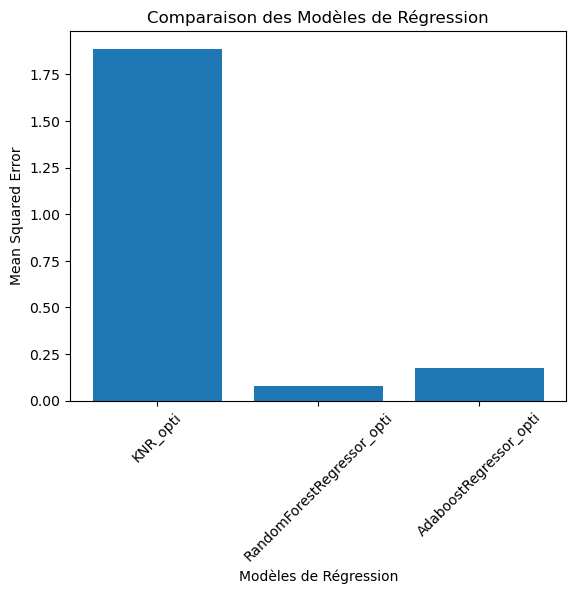

In [107]:
# Plot des performances par modèle (en retirant la regression linéaire qui ne marche pas bien du tout)

plt.bar(liste_modeles_abv[1:], liste_mse_abv[1:])
plt.xlabel('Modèles de Régression')
plt.ylabel('Mean Squared Error')
plt.title('Comparaison des Modèles de Régression')
plt.xticks(rotation=45)
plt.show()

In [108]:
erreur_moyenne_opti = np.sqrt(- grid_search_rfr.best_score_)
print(erreur_moyenne_opti)

0.2770916768409598


Le modèle optimal pour la prédiction du taux d'alcool (ABV) est donc un RandomForestRegressor optimisé qui prédit le taux d'alcool (non scalé) avec une erreur moyenne à 0.277°.

In [221]:
# Sérialisation de notre modèle optimal qui sera appelé dans l'application Web.

with open('regression_opti_filtre.pkl', 'wb') as file:
    pickle.dump(grid_search_rfr.best_estimator_, file)

In [225]:
# Paramètres du modèle optimal
grid_search_rfr.best_estimator_.feature_importances_

array([7.51663081e-03, 1.97593122e-04, 5.57508762e-04, 3.54125189e-02,
       2.42176150e-04, 9.52549798e-01, 1.42159162e-03, 7.31425719e-07,
       1.88721505e-07, 1.36022088e-07, 1.45424921e-05, 5.41052096e-05,
       6.14467206e-06, 4.23829424e-05, 1.84497404e-06, 1.98035322e-05,
       1.35186786e-04, 4.14093657e-06, 8.23306282e-06, 4.68259698e-06,
       3.77255475e-06, 2.99477298e-06, 9.21275086e-07, 4.63910762e-07,
       7.82665353e-07, 4.38077954e-06, 3.37991192e-06, 1.32814367e-05,
       3.90893375e-06, 8.71330276e-06, 6.09246586e-06, 3.44448591e-06,
       1.04132209e-05, 1.53301905e-06, 1.78959519e-06, 1.78086279e-06,
       7.39660172e-06, 1.51479858e-06, 5.09655471e-06, 4.35236244e-07,
       2.01339227e-06, 1.47709033e-06, 2.86711603e-06, 2.00931125e-06,
       1.15786278e-06, 8.02698298e-06, 1.08577706e-06, 1.52293987e-06,
       4.33524876e-07, 2.55012417e-06, 3.50251551e-06, 3.38433994e-06,
       1.27279335e-07, 2.21493003e-07, 1.30516850e-07, 7.78522496e-07,
      

A priori c'est diff_densité_fermentation qui impacte quasi complètement les prédictions

In [110]:
y_abv_test

0        6.04
1        5.15
2        5.42
3        8.34
4        5.13
         ... 
13645    5.80
13646    7.68
13647    6.81
13648    4.76
13649    4.62
Name: ABV, Length: 13650, dtype: float64

## Validation avec le jeu de test

In [111]:
y_abv_test_pred = grid_search_rfr.best_estimator_.predict(X_test)

In [112]:
mean_squared_error(y_abv_test, y_abv_test_pred)

0.02065848672924413

In [113]:
performances_regression_opti_test = np.sqrt(mean_squared_error(y_abv_test, y_abv_test_pred))
print(performances_regression_opti_test)

0.14373060470631902


#### Par curiosité sur le jeu de Test

In [114]:
from sklearn.metrics import r2_score

In [115]:
r2_score(y_abv_test, y_abv_test_pred)

0.993654828937627

**Conclusion** : Ce modèle est encore meilleur que nous l'avions imaginé sur les 14 484 données de test, avec une erreur de prédiction sur le degré d'alcool de 0.143 en moyenne !

# Prédiction de IBU_LABEL

**Méthodologie de résolution de notre problématique** :

Nous allons essayer de prédire la variable IBU_LABEL, correspondant à l'amertume de la bière, qui prend pour classes 0, 1, 2, 3 ou 4.

Nous sommes donc face à un problème de classification multi-classes, que nous allons transformer en sous-problèmes de classification binaire. Deux approches sont possibles :

**OvR** : On entraine **autant de classifieurs binaires qu'il y a de classes à prédire (ici 5)**. Chaque classifieur_classe a pour mission de discriminer sa classe par rapport au autres et proposera une prédiction sous la forme d'un score de probabilité d'appartenance à sa classe.

La prédiction finale sera effectuée en attribuant la classe prédite avec le **score de probabilité le plus grand parmi nos 5 classifieurs**.

Petit défaut de cette méthode : chaque classifieur binaire entrainé est soumis à un **problème de classification déséquilibrée**. Nous utiliserons une approche de type **sample_weight** pour pallier ce problème : pendant l'entrainement, chaque donnée de la classe minoritaire mal prédite pénalisera la fonction de perte de manière inversement proportionnelle à la fréquence d'apparition de la classe minoritaire dans le jeu d'entrainement.

**OvO** : On entraine **autant de classifieurs binaires qu'il y a de paires de classes à prédire (ici 10)**. Chaque classifieur_classes_x_y pour mission de discriminer ces deux classes et proposera une prédiction qui sera la classe x ou la classe y. 

La prédiction finale sera effectuée par **vote de la majorité sur nos 10 prédictions**.

Petits défauts de cette méthode : C'est plus complexe en termes de temps de calcul car le nombre de classifieurs à entraîner est un O(n_classes²) qui explose quand n_classes augmente. 

Il est également **soumis à des problèmes de classifications déséquilibrées si nos classes le sont**, nous utiliserons également **sample_weight** dans ce cas de figure.

En outre, si le vote de la majorité conduit à des ex-aequo, **sklearn attribuera la classe correspondant à la première à apparaitre dans l'ordre alphabétique** : si 1 et 2 sont ex-aequo pour une prédiction, la classe 1 sera prédite. On pourrait penser à d'autres méthodes de décisions, mais sklearn ne propose pas d'hyper-paramètre pour gèrer cela.


Nous testerons donc ces deux approches pour plusieurs familles de modèles, avec optimisation des hyper-paramètres via GridSearchCV avec **l'accuracy pour métrique d'évaluation**, c'est-à-dire la proportion de prédictions correctes.




In [116]:
# Création de listes pour recenser nos résultats.

liste_modeles_ibu = []
liste_accuracy_ibu = []

In [117]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import accuracy_score

### Regression logistique

In [118]:
from sklearn.linear_model import LogisticRegression

##### OvO

In [119]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver="saga")

log_reg_ovo = OneVsOneClassifier(log_reg)

In [120]:
# la structure de la grille n'est pas la même, le '__' est là pour indiquer que ce que l'on optimise
# concerne le modèle log_reg est non l'estimateur OneVsOneClassifier(log_reg) qui ne possède pas les mêmes hyper-paramètres

grille_log_reg = {
    'estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'estimator__C': [0.1, 0.5, 1, 2]
}


In [121]:
grid_search_log_reg_ovo = GridSearchCV(
    log_reg_ovo,
    param_grid=grille_log_reg,
    cv=5,
    scoring="accuracy",
    verbose = 5,
    n_jobs = -1
)

In [122]:
grid_search_log_reg_ovo.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\multiclass.py", line 690, in fit
    Parallel(n_jobs=self.n_jobs)(
  File "C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "C:\Users\A

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                       max_iter=1000,
                                                                       solver='saga')),
             n_jobs=-1,
             param_grid={'estimator__C': [0.1, 0.5, 1, 2],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=5)

In [123]:
grid_search_log_reg_ovo.best_params_, grid_search_log_reg_ovo.best_score_

({'estimator__C': 0.1, 'estimator__penalty': 'l1'}, 0.5252014652014652)

In [124]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('Regression_Logistique_OvO_opti')
liste_accuracy_ibu.append(grid_search_log_reg_ovo.best_score_)

##### OvR

In [125]:
log_reg_ovr = OneVsRestClassifier(log_reg)

In [126]:
grid_search_log_reg_ovr = GridSearchCV(
    log_reg_ovr,
    param_grid=grille_log_reg,
    cv=5,
    scoring="accuracy",
    verbose = 5,
    n_jobs = -1
)

In [127]:
grid_search_log_reg_ovr.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\multiclass.py", line 330, in fit
    self.estimators_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose)(
  File "C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                        max_iter=1000,
                                                                        solver='saga')),
             n_jobs=-1,
             param_grid={'estimator__C': [0.1, 0.5, 1, 2],
                         'estimator__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=5)

In [128]:
grid_search_log_reg_ovr.best_params_, grid_search_log_reg_ovr.best_score_

({'estimator__C': 0.5, 'estimator__penalty': 'l2'}, 0.5302014652014652)

In [129]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('Regression_Logistique_OvR_opti')
liste_accuracy_ibu.append(grid_search_log_reg_ovr.best_score_)

### KNeighborsClassifier

In [130]:
from sklearn.neighbors import KNeighborsClassifier

##### OvO

In [131]:
knr =  KNeighborsClassifier()
knr_ovo = OneVsOneClassifier(knr)

In [132]:
grille_knr = {'estimator__n_neighbors':[2, 3, 4, 5, 6, 7, 8], 'estimator__weights':('uniform', 'distance')}

In [133]:
grid_search_knr_ovo = GridSearchCV(
    knr_ovo,
    param_grid=grille_knr,
    cv=5,
    scoring="accuracy",
    verbose = 5,
    n_jobs = -1
)

In [134]:
grid_search_knr_ovo.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=KNeighborsClassifier()),
             n_jobs=-1,
             param_grid={'estimator__n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                         'estimator__weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=5)

In [135]:
grid_search_knr_ovo.best_params_, grid_search_knr_ovo.best_score_

({'estimator__n_neighbors': 8, 'estimator__weights': 'uniform'},
 0.5330952380952381)

In [136]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('KNearestNeighbors_OvO_opti')
liste_accuracy_ibu.append(grid_search_knr_ovo.best_score_)

##### OvR

In [137]:
knr_ovr = OneVsRestClassifier(knr)

In [138]:
grid_search_knr_ovr = GridSearchCV(
    knr_ovr,
    param_grid=grille_knr,
    cv=5,
    scoring="accuracy",
    verbose = 5,
    n_jobs = -1
)

In [139]:
grid_search_knr_ovr.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=KNeighborsClassifier()),
             n_jobs=-1,
             param_grid={'estimator__n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                         'estimator__weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=5)

In [140]:
grid_search_knr_ovr.best_params_, grid_search_knr_ovr.best_score_

({'estimator__n_neighbors': 8, 'estimator__weights': 'uniform'},
 0.5247252747252747)

In [141]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('KNearestNeighbors_OvR_opti')
liste_accuracy_ibu.append(grid_search_knr_ovr.best_score_)

### RandomForestClassifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
rfr = RandomForestClassifier(class_weight='balanced')

##### OvO

In [144]:
rfr_ovo = OneVsOneClassifier(rfr)

In [145]:
grille_rfr = {
    "estimator__n_estimators": [1, 10, 20, 50],
    "estimator__max_depth": [None, 1, 2, 3],
    "estimator__min_samples_split": [1, 2, 3],
}

In [146]:
grid_search_rfr_ovo = GridSearchCV(
    rfr_ovo,
    param_grid=grille_rfr,
    cv=5,
    scoring="accuracy",
    verbose = 3,
    n_jobs = -1
)

In [147]:
grid_search_rfr_ovo.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=RandomForestClassifier(class_weight='balanced')),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [None, 1, 2, 3],
                         'estimator__min_samples_split': [1, 2, 3],
                         'estimator__n_estimators': [1, 10, 20, 50]},
             scoring='accuracy', verbose=3)

In [148]:
grid_search_rfr_ovo.best_params_, grid_search_rfr_ovo.best_score_

({'estimator__max_depth': None,
  'estimator__min_samples_split': 2,
  'estimator__n_estimators': 50},
 0.5552380952380952)

In [149]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('RandomForestClassifier_OvO_opti')
liste_accuracy_ibu.append(grid_search_rfr_ovo.best_score_)

##### OvR

In [150]:
rfr_ovr = OneVsRestClassifier(rfr)

In [151]:
grid_search_rfr_ovr = GridSearchCV(
    rfr_ovr,
    param_grid=grille_rfr,
    cv=5,
    scoring="accuracy",
    verbose = 3,
    n_jobs = -1
)

In [152]:
grid_search_rfr_ovr.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced')),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [None, 1, 2, 3],
                         'estimator__min_samples_split': [1, 2, 3],
                         'estimator__n_estimators': [1, 10, 20, 50]},
             scoring='accuracy', verbose=3)

In [153]:
grid_search_rfr_ovr.best_params_, grid_search_rfr_ovr.best_score_

({'estimator__max_depth': None,
  'estimator__min_samples_split': 3,
  'estimator__n_estimators': 50},
 0.5552197802197802)

In [154]:
grid_search_rfr_ovr.best_estimator_.classes_

array([0, 1, 2, 3, 4], dtype=int64)

In [155]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('RandomForestClassifier_OvR_opti')
liste_accuracy_ibu.append(grid_search_rfr_ovr.best_score_)

### AdaBoostClassifier

In [156]:
from sklearn.ensemble import AdaBoostClassifier

In [157]:
ada = AdaBoostClassifier()

##### OvO

In [158]:
ada_ovo = OneVsOneClassifier(ada)

In [159]:
grille_ada = {
    "estimator__n_estimators": [50, 70, 100, 120, 150],
    "estimator__learning_rate": [0.5, 1, 1.5, 2, 2.5, 3]
    
}

In [160]:
grid_search_ada_ovo = GridSearchCV(
    ada_ovo,
    param_grid=grille_ada,
    cv=5,
    scoring="accuracy",
    verbose = 3,
    n_jobs = -1
)

In [161]:
grid_search_ada_ovo.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=OneVsOneClassifier(estimator=AdaBoostClassifier()),
             n_jobs=-1,
             param_grid={'estimator__learning_rate': [0.5, 1, 1.5, 2, 2.5, 3],
                         'estimator__n_estimators': [50, 70, 100, 120, 150]},
             scoring='accuracy', verbose=3)

In [162]:
grid_search_ada_ovo.best_params_, grid_search_ada_ovo.best_score_

({'estimator__learning_rate': 1, 'estimator__n_estimators': 120},
 0.5647802197802199)

In [163]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('AdaBoostClassifier_OvO_opti')
liste_accuracy_ibu.append(grid_search_ada_ovo.best_score_)

##### OvR

In [164]:
ada_ovr = OneVsRestClassifier(ada)

In [165]:
grid_search_ada_ovr = GridSearchCV(
    ada_ovr,
    param_grid=grille_ada,
    cv=5,
    scoring="accuracy",
    verbose = 3,
    n_jobs = -1
)

In [166]:
grid_search_ada_ovr.fit(X_train, y_ibu_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=AdaBoostClassifier()),
             n_jobs=-1,
             param_grid={'estimator__learning_rate': [0.5, 1, 1.5, 2, 2.5, 3],
                         'estimator__n_estimators': [50, 70, 100, 120, 150]},
             scoring='accuracy', verbose=3)

In [167]:
grid_search_ada_ovr.best_params_, grid_search_ada_ovr.best_score_

({'estimator__learning_rate': 1, 'estimator__n_estimators': 150},
 0.5633516483516484)

In [168]:
# Ajout du modèle optimal et de son accuracy

liste_modeles_ibu.append('AdaBoostClassifier_OvR_opti')
liste_accuracy_ibu.append(grid_search_ada_ovr.best_score_)

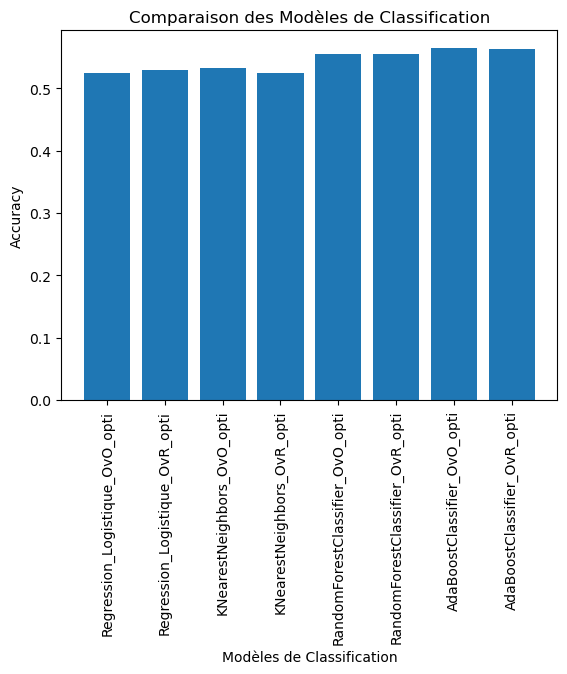

In [169]:
# Plot des performances par modèle 

plt.bar(liste_modeles_ibu, liste_accuracy_ibu)
plt.xlabel('Modèles de Classification')
plt.ylabel('Accuracy')
plt.title('Comparaison des Modèles de Classification')
plt.xticks(rotation=90)
plt.show()

In [170]:
liste_accuracy_ibu

[0.5252014652014652,
 0.5302014652014652,
 0.5330952380952381,
 0.5247252747252747,
 0.5552380952380952,
 0.5552197802197802,
 0.5647802197802199,
 0.5633516483516484]

In [171]:
grid_search_ada_ovo.best_estimator_

OneVsOneClassifier(estimator=AdaBoostClassifier(learning_rate=1,
                                                n_estimators=120))

In [219]:
#Sérialisation de notre imputer pour pouvoir l'appeler depuis l'application web

with open('classification_opti_filtre.pkl', 'wb') as file:
    pickle.dump(grid_search_ada_ovo.best_estimator_, file)

### Validation sur les données de test

In [249]:
y_ibu_pred = grid_search_ada_ovo.best_estimator_.predict(X_test)

In [250]:
accuracy_score(y_ibu_pred, y_ibu_test)

0.5634432234432234

Pas d'overfitting ni d'underfitting, l'accuracy est sensiblement la même sur les 13.4k données de test !

# Entrainement de regresseur pour la variable IBU

# modèle 1: Regression linéaire IBU

In [212]:
#création de listes pour recenser nos résultats

liste_models_ibu =[]
liste_mse_ibu=[]

In [ ]:
liste

In [174]:
# La régression linéaire n'a pas d'hyperparamètres, nous devons donc effectuer un nouveau split

X_train_reg_lin, X_test_reg_lin, y_ibu_regression_train_bis, y_ibu_regression_test_bis = train_test_split(X_train, y_ibu_regression_train, 
                                                                                            test_size =0.2, random_state= 60)

In [175]:
from sklearn.linear_model import LinearRegression
reg_lin_ibu = LinearRegression()

In [176]:
# Entrainement de la régression linéaire
reg_lin_ibu.fit(X_train_reg_lin, y_ibu_regression_train_bis)

LinearRegression()

In [208]:
X_train_reg_lin.columns

Index(['Color', 'BoilTime', 'Efficiency', 'SugarScale', 'PrimaryTemp',
       'diff_densite_fermentation', 'qte_eau_litre_biere', 'Style_altbier',
       'Style_alternative grain beer', 'Style_alternative sugar beer',
       ...
       'Style_weizenbock', 'Style_wheatwine', 'Style_wild specialty beer',
       'Style_winter seasonal beer', 'Style_witbier', 'Style_wood-aged beer',
       'BrewMethod_All Grain', 'BrewMethod_BIAB', 'BrewMethod_Partial Mash',
       'BrewMethod_extract'],
      dtype='object', length=186)

In [177]:
reg_lin_ibu.coef_

array([ 2.54837345e+01,  1.37132835e+01, -7.12751564e+00,  1.03016262e+01,
       -4.39899248e+00, -1.62855711e+01,  9.61256643e+00, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -3.66513731e+13, -3.66513731e+13, -3.66513731e+13,
       -3.66513731e+13, -

In [178]:
# Récupération des prédictions sur le jeu de test, on est obligé d' utiliser le jeu de test car on n a pas d hyperparamètre en régression linéaire

y_pred_reg_lin_ibu = reg_lin_ibu.predict(X_test_reg_lin)

In [179]:
from sklearn.metrics import mean_squared_error
# mse de la regression linéaire
mse_reg_lin_ibu = mean_squared_error(y_pred_reg_lin_ibu, y_ibu_regression_test_bis)
print(mse_reg_lin_ibu)

274.1721243510688


In [213]:
liste_models_ibu.append('Régression linéaire ibu')
liste_mse_ibu.append(mse_reg_lin_ibu)

# modèle 2 ibu : KNeighborsRegressor

In [181]:
from sklearn.neighbors import KNeighborsRegressor

In [182]:
knr_ibu = KNeighborsRegressor()

In [183]:
grille_knr_ibu = {'n_neighbors' : [2, 3, 4, 5 , 6, 7, 8],
             'weights' : ('uniform', 'distance')}

In [184]:
from sklearn.model_selection import GridSearchCV
grid_search_knr_ibu = GridSearchCV(estimator = knr_ibu, param_grid = grille_knr_ibu, scoring ='neg_mean_squared_error', cv= 5, verbose = 3, n_jobs = -1)

In [185]:
grid_search_knr_ibu.fit(X_train, y_ibu_regression_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                         'weights': ('uniform', 'distance')},
             scoring='neg_mean_squared_error', verbose=3)

In [186]:
# Récupération du KNR-opti et du score

grid_search_knr_ibu.best_params_ , grid_search_knr_ibu.best_score_

({'n_neighbors': 8, 'weights': 'uniform'}, -292.66700906272894)

In [187]:
mse_knr_ibu =  - grid_search_knr_ibu.best_score_

In [214]:
liste_models_ibu.append('KNeighbors ibu')
liste_mse_ibu.append(mse_knr_ibu)

# modèle 3 ibu : RandomForestRegressor

In [189]:
from sklearn.ensemble import RandomForestRegressor


In [190]:
rfr_ibu = RandomForestRegressor()

In [191]:
grille_rfr_ibu = {'n_estimators': [1, 10, 20, 50], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

In [192]:
grid_search_rfr_ibu = GridSearchCV(estimator = rfr_ibu, param_grid = grille_rfr_ibu, scoring ='neg_mean_squared_error', cv= 5, verbose = 5, n_jobs = -1)

In [193]:
grid_search_rfr_ibu.fit(X_train, y_ibu_regression_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1, 10, 20, 50]},
             scoring='neg_mean_squared_error', verbose=5)

In [194]:
# Récupération du RFR-opti et du score

grid_search_rfr_ibu.best_params_ , grid_search_rfr_ibu.best_score_

({'max_depth': None, 'min_samples_split': 3, 'n_estimators': 50},
 -271.10169118543325)

In [195]:
mse_rfr_ibu =  - grid_search_rfr_ibu.best_score_

In [215]:
liste_models_ibu.append('RandomForestRegressor ibu')
liste_mse_ibu.append(mse_rfr_ibu)

# modèle 4 ibu : Adaboost Regressor

In [197]:
from sklearn.ensemble import AdaBoostRegressor

In [198]:
adaboost_ibu = AdaBoostRegressor()

In [199]:
grille_adabr_ibu = {'n_estimators' : [1, 10, 20 , 50], 'learning_rate' : [0.1, 0.5, 1.0, 2.0],
                'loss' : ('linear', 'square', 'exponential')}

In [200]:
grid_search_adabr_ibu = GridSearchCV(estimator = adaboost_ibu, param_grid= grille_adabr_ibu, scoring = 'neg_mean_squared_error', cv = 5, verbose = 5, n_jobs = -1)

In [201]:
grid_search_adabr_ibu.fit(X_train, y_ibu_regression_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 2.0],
                         'loss': ('linear', 'square', 'exponential'),
                         'n_estimators': [1, 10, 20, 50]},
             scoring='neg_mean_squared_error', verbose=5)

In [202]:
# Récupération du KNR-opti et du score

grid_search_adabr_ibu.best_params_ , grid_search_adabr_ibu.best_score_

({'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 20},
 -356.91693601569034)

In [203]:
mse_adabr_ibu =  - grid_search_adabr_ibu.best_score_

In [216]:
liste_models_ibu.append('Adaboost ibu')
liste_mse_ibu.append(mse_adabr_ibu)

In [207]:
liste_models_ibu

['Régression linéaire ibu',
 'KNeighbors ibu',
 'RandomForestRegressor ibu',
 'Adaboost ibu']

In [217]:
liste_mse_ibu

[274.1721243510688, 292.66700906272894, 271.10169118543325, 356.91693601569034]

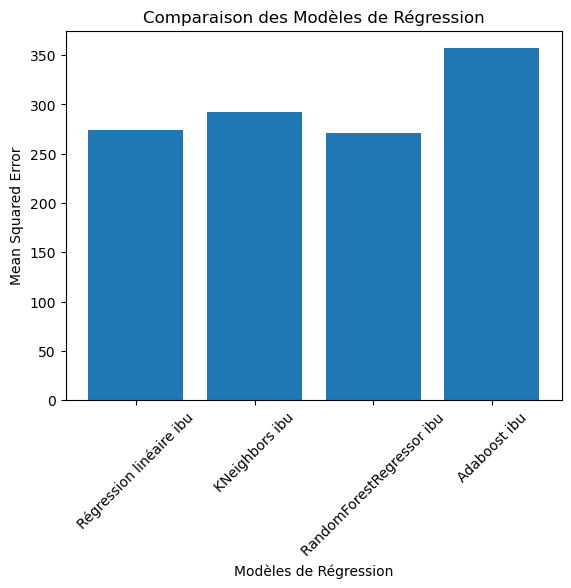

In [218]:
plt.bar(liste_models_ibu, liste_mse_ibu)
plt.xlabel('Modèles de Régression')
plt.ylabel('Mean Squared Error')
plt.title('Comparaison des Modèles de Régression')
plt.xticks(rotation=45)
plt.show()

In [220]:
#Sérialisation de notre imputer pour pouvoir l'appeler depuis l'application web

with open('reg_opti_filtre_ibu.pkl', 'wb') as file:
    pickle.dump(grid_search_rfr_ibu.best_estimator_, file)

In [232]:
X_train.columns[:15]

Index(['Color', 'BoilTime', 'Efficiency', 'SugarScale', 'PrimaryTemp',
       'diff_densite_fermentation', 'qte_eau_litre_biere', 'Style_altbier',
       'Style_alternative grain beer', 'Style_alternative sugar beer',
       'Style_american amber ale', 'Style_american barleywine',
       'Style_american brown ale', 'Style_american ipa',
       'Style_american lager'],
      dtype='object')

In [229]:
grid_search_rfr_ibu.best_estimator_.feature_importances_

array([1.77879155e-01, 3.04722689e-02, 5.43544267e-02, 6.57378493e-04,
       4.69941859e-02, 1.43827235e-01, 1.08198553e-01, 5.60939472e-04,
       4.87166590e-04, 1.59725396e-04, 3.39786610e-03, 5.85218328e-03,
       1.65568417e-03, 1.70478316e-01, 6.55452910e-04, 4.84281604e-03,
       2.79360907e-02, 9.30617035e-04, 3.09744859e-03, 5.40943623e-03,
       5.29449361e-04, 9.35232795e-04, 7.82118501e-05, 4.84082997e-05,
       2.09275130e-04, 4.38276683e-04, 5.86364525e-04, 6.07913506e-04,
       1.51747071e-03, 5.27091141e-04, 1.34177017e-03, 1.61199356e-03,
       5.63331574e-04, 2.79587996e-03, 7.16414764e-04, 3.94980404e-04,
       1.44445310e-03, 1.04142451e-03, 4.27885277e-04, 3.53247139e-04,
       3.63878486e-04, 6.41260611e-04, 1.25995117e-03, 7.65670236e-04,
       5.86033348e-04, 3.46699583e-03, 3.75292714e-04, 1.24190230e-04,
       1.63345444e-04, 9.77420435e-04, 3.52475822e-04, 9.35910366e-04,
       2.36121432e-05, 3.33329827e-05, 1.75863241e-04, 4.54481637e-04,
      

### Validation sur le jeu de test

In [ ]:
y_abv_test_pred = grid_search_rfr.best_estimator_.predict(X_test)

In [233]:
y_ibu_regression_test_pred = grid_search_rfr_ibu.best_estimator_.predict(X_test)

In [236]:
y_ibu_regression_test

67536     2.66
254      72.58
51948     0.00
44657    16.36
53637    24.61
         ...  
41024    63.66
10473     0.00
3938     40.65
421      26.41
60308    17.94
Name: IBU, Length: 13650, dtype: float64

In [237]:
mean_squared_error(y_ibu_regression_test_pred, y_ibu_regression_test)

271.2886575852207

Il n'y a pas d'overfitting, les prédictions sur les 13650 données de test on la même erreur moyenne de prédiction

In [238]:
X_test.shape

(13650, 186)

### BONUS : Essayons de comparer les étiquettes prédites par notre régréssion optimale

In [240]:
y_ibu_regression_test_pred

array([20.96891762, 40.25817667,  6.33701   , ..., 47.49452   ,
       39.34240571, 27.52319905])

In [243]:
liste_etiquettes = []
for val in y_ibu_regression_test_pred:

    

    if val < 20:

        val_etiquette = 0
        liste_etiquettes.append(val_etiquette)

    elif val >= 20 and val < 40:

        val_etiquette = 1
        liste_etiquettes.append(val_etiquette)


    elif val >= 40 and val < 60:

        val_etiquette = 2
        liste_etiquettes.append(val_etiquette)

    elif val >= 60 and val < 80:

        val_etiquette = 3
        liste_etiquettes.append(val_etiquette)


    else:

        val_etiquette = 4
        liste_etiquettes.append(val_etiquette)

y_ibu_etiquettes_pred = np.array(liste_etiquettes)

In [248]:
accuracy_score(y_ibu_etiquettes_pred, y_ibu_test)

0.5386813186813186

L'approche de classfication par une régression puis un encodage n'aura donc pas eu d'impact !